### Task 1 

Generate a quantum algorithm that returns the larger number between two integers.

### Solution

The first step to solving this problem is to find the best representation for the two integers, which we do as follows:

1. Find the binary representation of the two integers, ignoring their signs. For example, if we have the numbers -12 and 6, we find the binary representations of 12 and 6.

2. Equalize the number of bits. The binary representations of 12 and 6 are 1100 and 110, respectively. To equalize the number of bits in these representations, we add 0's to the left of the representation with the smaller number of bits until we obtain equality. In the example above, we need to add a 0 to the left of 110, resulting in 0110. In the case of 100011 and 11, we need to add four 0's to the left of 11, resulting in 000011.

3. Add the sign back. If the integer has a positive sign, we add a 1 to its left, and if it has a negative sign, we add a 0. For the numbers -12 and 6, we would have 01100 and 10110, respectively.

To check which number is greater, simply compare bit by bit, from left to right.

We can compare them using a 4-qubit circuit. In the first two qubits, we initialize the values corresponding to the representations, while the last two qubits are always initialized in the state |00⟩. We apply two CNOT gates with targets on the last two qubits and measure them. If we obtain the states |01⟩ or |10⟩ in the measurement, then we can determine which of the two numbers is greater.

### Importing standard Qiskit libraries

In [12]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2023-03-02 16:54:53,344: Credentials are already in use. The existing account in the session will be replaced.


### The code

In [84]:
def find_the_largest_number (integer_1,integer_2):
    
    """
    This program takes two integers as input and returns which one is the greater.
    """
    
    #Finding the representation of qubits
    
    get_bin = lambda x: format(x, 'b')
    enc1=str(get_bin(integer_1))
    enc2=str(get_bin(integer_2))
    if enc1[0]=="-": enc1_='0'+enc1[1:]
    else: enc1_='1'+enc1
    if enc2[0]=="-": enc2_='0'+enc2[1:]
    else: enc2_='1'+enc2
    aux1=enc1_[1:]
    aux2=enc2_[1:]
    while len(aux1)!=len(aux2):
        if len(aux1)>len(aux2):
            aux2="0"+aux2
        else:
            aux1="0"+aux1
                
    aux1=enc1_[0]+aux1
    aux2=enc2_[0]+aux2
    print("integer 1 = {}, representation = {}".format(integer_1,aux1))
    print("integer 2 = {}, representation = {}".format(integer_2,aux2))
    n=max(len(aux1),len(aux2))
    
    # Implementing the circuit.
    
    qr1=QuantumRegister(2)
    qr2=QuantumRegister(2)
    cr1=ClassicalRegister(2)
    qc=QuantumCircuit(qr1,qr2,cr1)
    
    lista=[]
    
    for i in range(n):
    
        qc.initialize(aux1[i],0)
        qc.initialize(aux2[i],1)
        qc.initialize("0",2)
        qc.initialize("0",3)
        qc.cx(0,2) 
        qc.cx(1,3)
        qc.measure(qr2,[0,1])
        
        # We implemented the circuit and ran it for each qubit until we obtained the answer.
        
        backend=Aer.get_backend("statevector_simulator")
        output=backend.run(qc,shots=1).result().get_counts()
        
        x=list(output.keys())
        lista.append(x)
        
        # Checking the results.
        
        if output.get("10")==1 and lista[0][0]!="00":
            display(qc.draw("mpl"))
            return integer_2
        
        elif output.get("10")==1 and lista[0][0]=="00":  
            display(qc.draw("mpl"))
            return integer_1 
        
        elif output.get("01")==1 and lista[0][0]!="00":
            display(qc.draw("mpl"))
            return integer_1 
        
        elif output.get("01")==1 and lista[0][0]=="00":
            display(qc.draw("mpl"))
            return integer_2 
    
    display(qc.draw("mpl")) 
    return "They are equal"  
    
    
  
    
    
    

### Tests

integer 1 = 26, representation = 1011010
integer 2 = 46, representation = 1101110


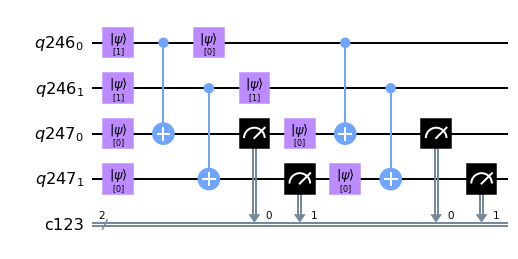

Test 1: 46
--------------------------------------------
integer 1 = -26, representation = 011010
integer 2 = -24, representation = 011000


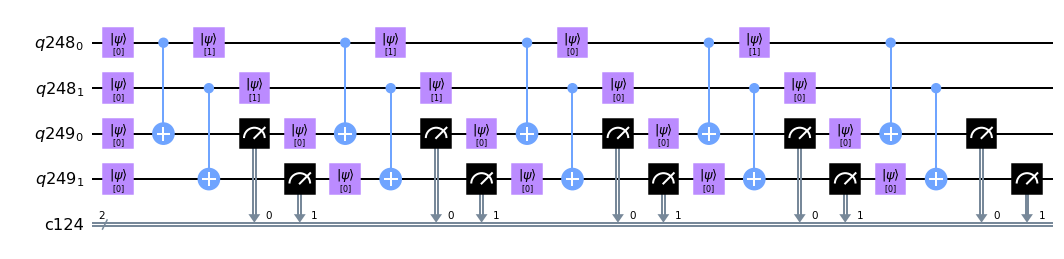

Test 2: -24
--------------------------------------------
integer 1 = 48, representation = 1110000
integer 2 = 48, representation = 1110000


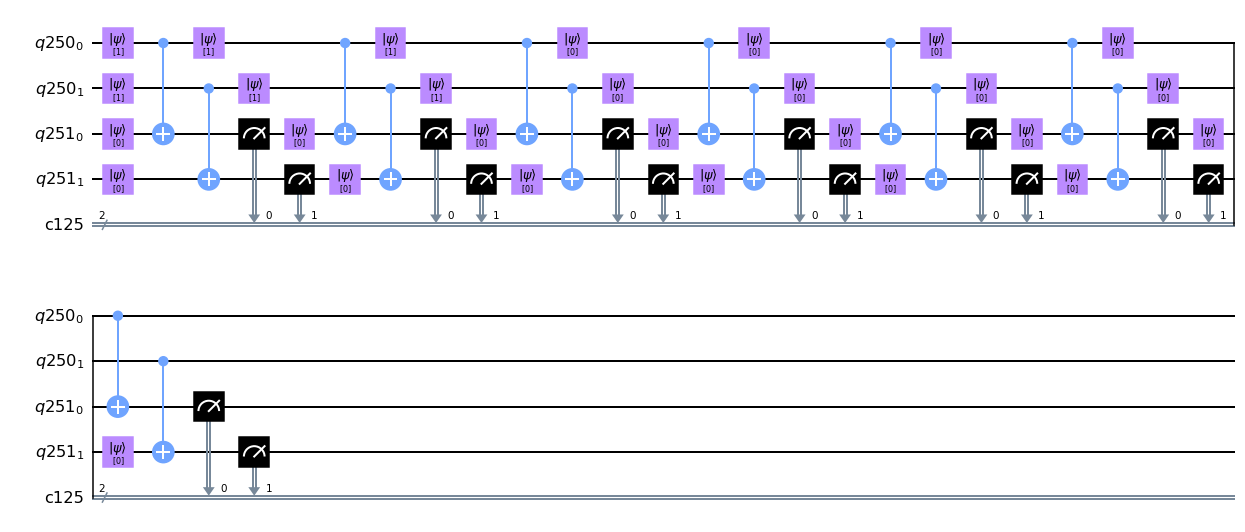

Test 3: They are equal


In [99]:
import random
print("Test 1:",find_the_largest_number(random.randint(-10*5, 10*5),random.randint(-10*5, 10*5)))
print("--------------------------------------------")
print("Test 2:",find_the_largest_number(random.randint(-10*5, 10*5),random.randint(-10*5, 10*5)))
print("--------------------------------------------")
print("Test 3:",find_the_largest_number(random.randint(-10*5, 10*5),random.randint(-10*5, 10*5)))

### Task 2

Given four positive integers A, B, C, D, determine if there’s a rectangle such that the lengths of its sides are A, B, C and D (in any order).

Note that we can solve this task simply by applying Task 1:

In [96]:
def is_rectangle(integer_1, integer_2, integer_3, integer_4):
    
    """
    Function that takes four positive integers as input and returns 1 
    if there exists a rectangle with sides of such lengths, otherwise returns 0.  
    """
    # Checking sides of zero or negative length.
    
    if integer_1<=0 or integer_2<=0 or integer_3<=0 or integer_4<=0: return 0

    # Applying the function to each possible combination

    lista=[integer_1, integer_2, integer_3, integer_4]
    
    if find_the_largest_number(lista[0],lista[1])=="They are equal" and find_the_largest_number(lista[2],lista[3])=="They are equal":
        return 1
    
    if find_the_largest_number(lista[0],lista[2])=="They are equal" and find_the_largest_number(lista[1],lista[3])=="They are equal":
        return 1

    if find_the_largest_number(lista[0],lista[3])=="They are equal" and find_the_largest_number(lista[1],lista[2])=="They are equal":
        return 1
    return 0
   

### Tests

integer 1 = 5, representation = 1101
integer 2 = 5, representation = 1101


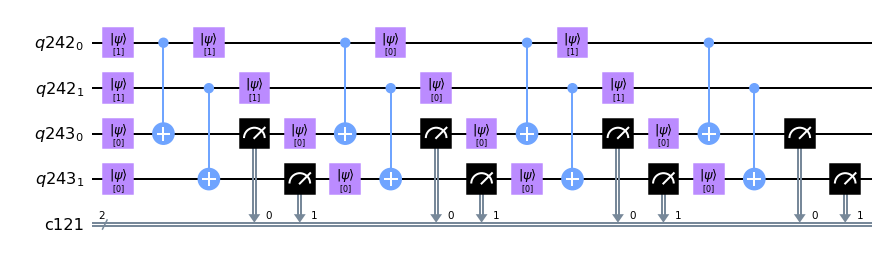

integer 1 = 10, representation = 11010
integer 2 = 10, representation = 11010


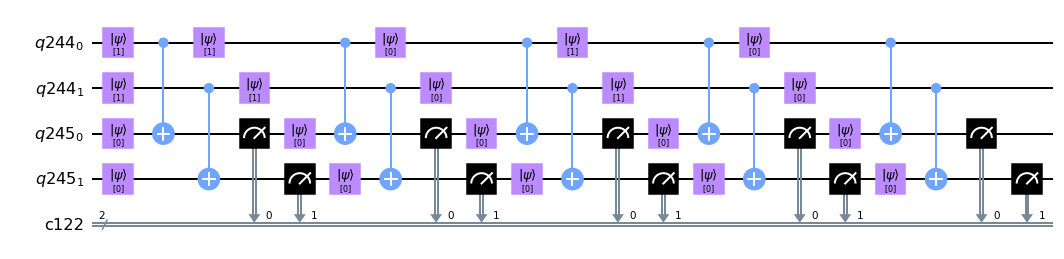

Test 1: 1
--------------------------------------------
Test 2: 0
--------------------------------------------
Test 3: 0


In [98]:
print("Test 1:",is_rectangle(5,5,10,10))
print("--------------------------------------------")
print("Test 2:",is_rectangle(0,0,10,10))
print("--------------------------------------------")
print("Test 3:",is_rectangle(1,-1,10,10))